In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2024-12-04 18:38:27.173621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733312307.191725    6260 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733312307.196596    6260 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 18:38:27.215094: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.18.0


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from sklearn.model_selection import train_test_split
import pandas as pd
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Menetapkan batas waktu pelatihan
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image  # This should now work without errors.
# from google.colab import drive
# drive.mount('/content/drive')

from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization


In [37]:
# dari bapaknya
# base_dir = 'C:/xampp/htdocs/dataset/animal_dataset'
base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal_original_data/animal_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
folders=os.listdir(train_dir)

#tambahan sendiri
image_paths = []
labels = []
for class_name in folders:
    class_dir = os.path.join(train_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)

In [38]:
# Split dataset into training (80%) and validation (20%)
# X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
print(len(X_train),len(X_val))
print(len(y_train),len(y_val))

16 4
16 4


In [36]:
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    )

val_datagen = ImageDataGenerator(rescale=1./255)
# dari bapaknya
# train_generator = train_datagen.flow_from_directory(
#                     train_dir,
#                     target_size=(150, 150),
#                     batch_size=1
#                     )
# validation_generator = val_datagen.flow_from_directory(
#                     validation_dir,
#                     target_size=(150, 150),
#                     batch_size=1
#                     )

# buatan sendiri
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}), # direktori data latih
    x_col='filename',
    y_col='class',
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=1,
    class_mode='categorical', # menggunakan categorical karena klasifikasi lebih dari 2 kelas
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_val, 'class': y_val}), # direktori data validasi
    x_col='filename',
    y_col='class',
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=1,
    class_mode='categorical',
)

Found 20 validated image filenames belonging to 5 classes.
Found 5 validated image filenames belonging to 5 classes.


In [28]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
# start
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
# x = layers.Conv2D(128, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)
# end
x = layers.Flatten()(x)
# x = layers.Dense(50, activation='sigmoid')(x)
x = layers.Dense(64, activation='relu')(x)
Dropout(0.5),
output = layers.Dense(5, activation='softmax')(x)
model = Model(img_input, output)
# model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

# model CNN buatan sendiri
# model = tf.keras.models.Sequential([
#     Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(512,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(5, activation='softmax') # 5 classes output
# ])
# model.compile(optimizer='SGD',
#     loss='mean_squared_error',
#     metrics=['accuracy'])
# model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,207,717 (4.61 MB)

 Trainable params: 1,207,717 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
            train_generator,
            # steps_per_epoch=20,
            epochs=100,
            validation_data=validation_generator,
            # validation_steps=10,
            # verbose=2
            )

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.7500 - val_loss: 4.2112
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.7500 - val_loss: 4.5123
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.7003e-04 - val_accuracy: 0.7500 - val_loss: 4.9401
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 2.1352e-04 - val_accuracy: 0.7500 - val_loss: 4.8895
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 6.9637e-04 - val_accuracy: 0.7500 - val_loss: 4.9300
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 1.5970e-04 - val_accuracy: 0.5000 - val_loss: 5.6661
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.7500 - val_loss: 5.0142
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9935 - loss: 0.0289 - val_ac

In [8]:
# Load history
history = model.history

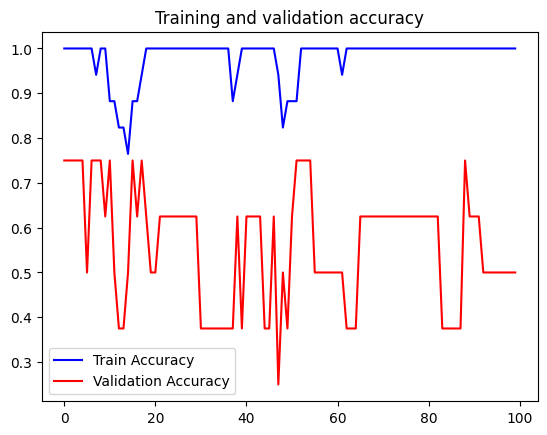

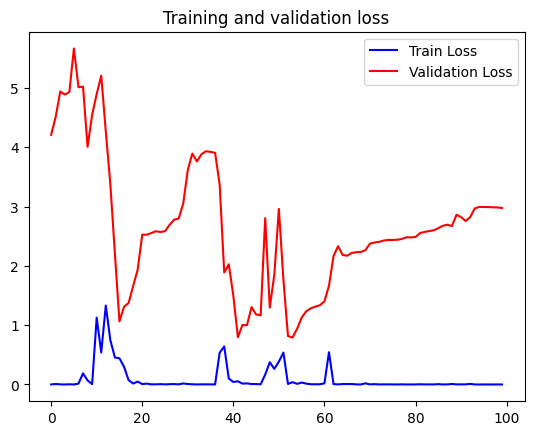

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# Simpan atau panggil kembali `model`

In [ ]:
# model.save('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000_EarlyStopping.h5')

In [ ]:
# panggil model jika sudah pernah dibuat sebelumnya
# jika pertama kali menjalankan, komentar kode ini agar tidak error
# model = tf.keras.models.load_model('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000.h5')  # Ganti dengan nama file model Anda


# Tahap ini untuk melakukan Prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Nilai Output Units:
 [[0. 0. 0. 1. 0.]]


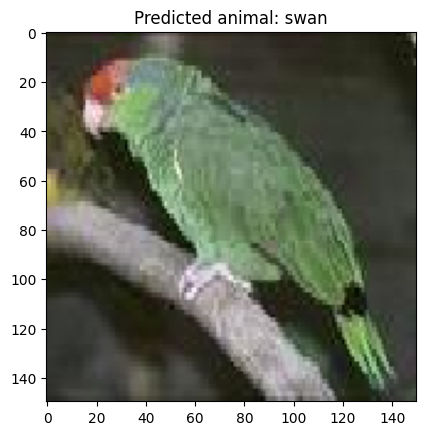

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Nilai Output Units:
 [[3.8189594e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


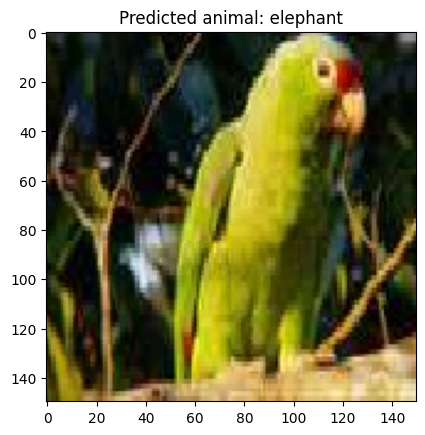

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nilai Output Units:
 [[0. 0. 0. 1. 0.]]


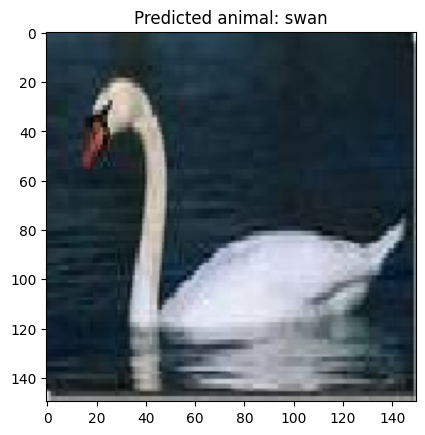

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 1.]]


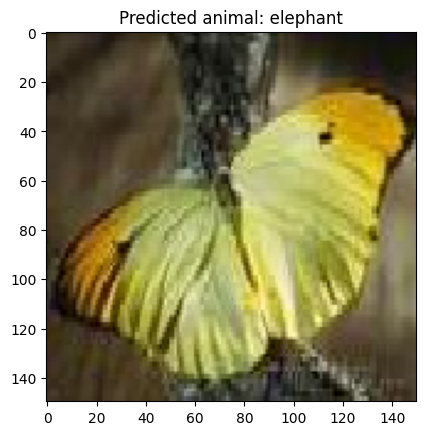

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nilai Output Units:
 [[0. 0. 1. 0. 0.]]


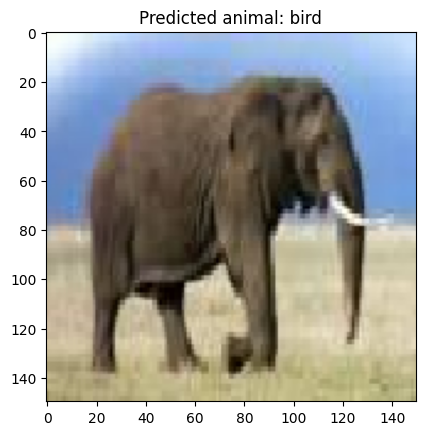

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nilai Output Units:
 [[0. 0. 1. 0. 0.]]


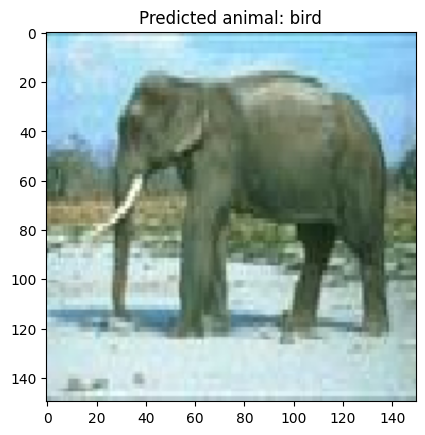

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Nilai Output Units:
 [[0. 0. 0. 1. 0.]]


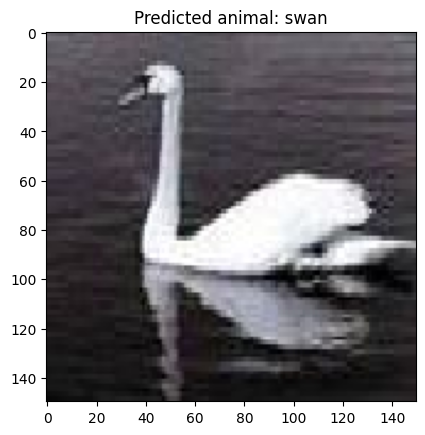

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nilai Output Units:
 [[0. 0. 0. 1. 0.]]


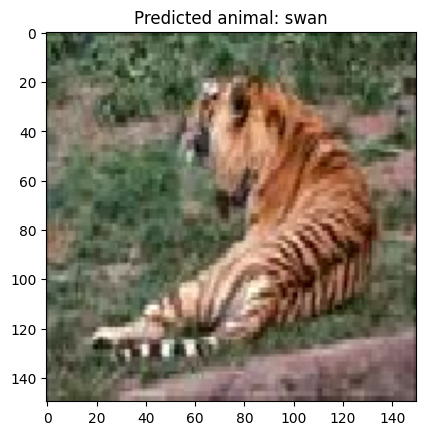

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 1.]]


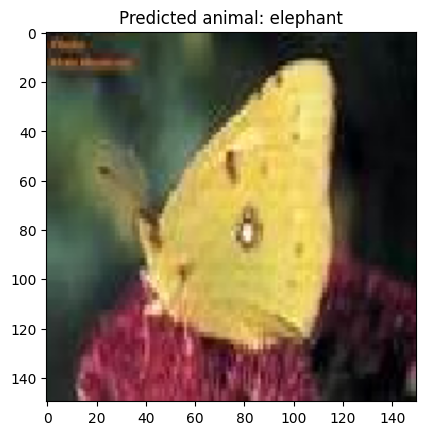

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nilai Output Units:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.5158236e-29]]


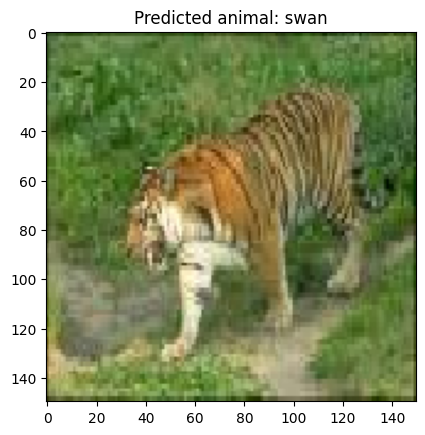

############################################


In [25]:
from keras.preprocessing.image import load_img,img_to_array
# buatan sendiri
for filename in os.listdir(test_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150,150))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        preds = model.predict(x)
        print("Nilai Output Units:\n", preds)
        index_preds = np.argmax(preds)
        img_print = image.load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        plt.imshow(img_print)
        plt.title(f'Predicted animal: {folders[index_preds]}')
        plt.show()
        print("############################################")

# Identitas Penulis
- Nama: Widi Arrohman
- Email: widiarrohman1234@gmail.com